In [2]:
!pip install seaborn

     |████████████████████████████████| 215 kB 3.0 MB/s eta 0:00:01


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [19]:
!pip install plotly

     |████████████████████████████████| 7.1 MB 2.3 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=ea32dc39971aa1c66c8cd139b515c33aa140b80c64100b15b6bc784133023b77
  Stored in directory: /Users/pruthaparmar/Library/Caches/pip/wheels/ac/cb/8a/b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf
Successfully built retrying


In [22]:
import plotly.express as px

In [37]:
#reading data 
data= pd.read_csv("novel-corona-virus-2019-dataset/covid_19_data.csv")

In [38]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [39]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,4247.000000,4247.000000,4247.000000,4247.000000
mean,2124.000000,586.884624,17.530257,187.914528
std,1226.147626,5033.596411,190.278672,1976.388824
min,1.000000,0.000000,0.000000,0.000000
25%,1062.500000,1.000000,0.000000,0.000000
50%,2124.000000,9.000000,0.000000,1.000000
75%,3185.500000,99.500000,1.000000,16.000000
max,4247.000000,67707.000000,2986.000000,45235.000000


In [40]:
#sno is unimportant, so we will drop it!
data.drop("SNo", axis=1, inplace=True)

In [41]:
#last update is also umimportant from the persepective of EDA
data.drop("Last Update", axis=1, inplace=True)

In [42]:
data.info

<bound method DataFrame.info of      ObservationDate                        Province/State  Country/Region  \
0         01/22/2020                                 Anhui  Mainland China   
1         01/22/2020                               Beijing  Mainland China   
2         01/22/2020                             Chongqing  Mainland China   
3         01/22/2020                                Fujian  Mainland China   
4         01/22/2020                                 Gansu  Mainland China   
...              ...                                   ...             ...   
4242      03/08/2020                    Northern Territory       Australia   
4243      03/08/2020  Lackland, TX (From Diamond Princess)              US   
4244      03/08/2020                 Montgomery County, TX              US   
4245      03/08/2020     Omaha, NE (From Diamond Princess)              US   
4246      03/08/2020    Travis, CA (From Diamond Princess)              US   

      Confirmed  Deaths  Recove

In [43]:
country_list=list(data['Country/Region'].unique())
print(country_list)
print(len(country_list))

['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint Barthelemy', 

In [44]:
#data.rename(columns={'Country/Region': 'Country'}, inplace=True)

In [45]:
data

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
4242,03/08/2020,Northern Territory,Australia,0.0,0.0,0.0
4243,03/08/2020,"Lackland, TX (From Diamond Princess)",US,0.0,0.0,0.0
4244,03/08/2020,"Montgomery County, TX",US,0.0,0.0,0.0
4245,03/08/2020,"Omaha, NE (From Diamond Princess)",US,0.0,0.0,0.0


In [49]:
# #SOURCE for part of this code: https://towardsdatascience.com/coronavirus-data-visualizations-using-plotly-cfbdb8fcfc3d
# data = px.data.gapminder()
# #bar_data = data.groupby(['Country/Region', 'ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index().sort_values('ObservationDate', ascending=True)
# #bar_data=data.groupby(['Country/Region']).sum().reset_index().sort_values('ObservationDate', ascending=True)
# df_country=data.groupby(['Country/Region']).max().reset_index(drop=None)
# # fig = px.bar(bar_data, x="Date", y="Confirmed", color='Country', text = 'Confirmed', orientation='v', height=600,
# #              title='Cases')
# # fig.show()

# # fig = px.bar(bar_data, x="Date", y="Deaths", color='Country', text = 'Deaths', orientation='v', height=600,
# #              title='Deaths')
# # fig.show()

# # fig = px.bar(bar_data, x="Date", y="Recovered", color='Country', text = 'Recovered', orientation='v', height=600,
# #              title='Recovered')
# # fig.show()

In [54]:
#reading data 
data1= pd.read_csv("novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")

In [56]:
data1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91


In [57]:
#reading data 
data2= pd.read_csv("novel-corona-virus-2019-dataset/2019_nCoV_data.csv")

In [58]:
data2.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [65]:
#combining china and mainland china because it is problematic in plots below: it gives wrong information
data2.loc[data2['Country']=='Mainland China','Country']='China'

In [75]:
#SOURCE for part of this code: https://towardsdatascience.com/coronavirus-data-visualizations-using-plotly-cfbdb8fcfc3d
data = px.data.gapminder()
bar_data = data2.groupby(['Country', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index().sort_values('Date', ascending=True)
#bar_data=data.groupby(['Country/Region']).sum().reset_index().sort_values('ObservationDate', ascending=True)
# df_country=data.groupby(['Country/Region']).max().reset_index(drop=None)
fig = px.bar(bar_data, x="Date", y="Confirmed", color='Country', text = 'Confirmed', orientation='v', height=600,
             title='Cases')
fig.show()


In [67]:
fig = px.bar(bar_data, x="Date", y="Deaths", color='Country', text = 'Deaths', orientation='v', height=600,
             title='Deaths')
fig.show()


In [68]:
fig = px.bar(bar_data, x="Date", y="Recovered", color='Country', text = 'Recovered', orientation='v', height=600,
             title='Recovered')
fig.show()

## From the plots above we can see China is dominating so for meaningful insights lets do a separate plot for China and other countries

In [73]:
countries_no_china = data2[data2['Country'] != 'China']

In [77]:
bar_data1 = countries_no_china.groupby(['Country', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index().sort_values('Date', ascending=True)

In [78]:
fig = px.bar(bar_data1, x="Date", y="Confirmed", color='Country', text = 'Confirmed', orientation='v', height=600,
             title='Cases')
fig.show()


In [79]:
fig = px.bar(bar_data1, x="Date", y="Deaths", color='Country', text = 'Deaths', orientation='v', height=600,
             title='Deaths')
fig.show()

In [80]:
fig = px.bar(bar_data1, x="Date", y="Recovered", color='Country', text = 'Recovered', orientation='v', height=600,
             title='Recovered')
fig.show()

## From the figures you can say that after China, countries like Japan, Mexico, Singapore, Hong Kong, France etc are places with confirmed cases of the virus. The number of reported deaths doesnot provide any link between confirmed cases and death i.e. we cant infer that getting the diesease results into death. Thus, some other factors need to be analysed. As far as the recovered cases are concerned the number is small. 

## Also one major observation is that ther is a big difference between the effect of virus in China vs the rest of the world. 

## A good way to validate the data is to check it with reliable sources like WHO which is beyond the scope of this challenge.

## Total Confirmed cases continue to increase but %Increase in confirmed cases over time has not shown any linear trend to date! So, the question I would like to address from the available data is will the Corona outbreak continue with time or is there an end to it? Basically relation between Corona and time!

# NEXT: Building a model that can make sense out of the data and address our question.

In [141]:
#preparing data for a time-series analysis
df_by_date=data2.groupby(['Date']).sum().reset_index(drop=None)
df_by_date

,Date,Sno,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,741,555.0,0.0,0.0
1,01/23/2020 12:00:00,2745,653.0,18.0,30.0
2,01/24/2020 12:00:00,4264,941.0,26.0,36.0
3,01/25/2020 22:00:00,6446,2019.0,56.0,49.0
4,01/26/2020 23:00:00,9024,2794.0,80.0,54.0
5,01/27/2020 20:30:00,12558,4473.0,107.0,63.0
6,01/28/2020 23:00:00,15262,6057.0,132.0,110.0
7,01/29/2020 21:00:00,19460,7783.0,170.0,133.0
8,01/30/2020 21:30:00,23895,9776.0,213.0,187.0
9,01/31/2020 19:00:00,29358,11374.0,259.0,252.0


In [142]:
#For this analysis lets create a new dataset that contains counts of confirmed cases vs date
df = pd.concat([df_by_date['Date'], df_by_date['Confirmed']], axis=1)

In [143]:
df

,Date,Confirmed
0,01/22/2020 12:00:00,555.0
1,01/23/2020 12:00:00,653.0
2,01/24/2020 12:00:00,941.0
3,01/25/2020 22:00:00,2019.0
4,01/26/2020 23:00:00,2794.0
5,01/27/2020 20:30:00,4473.0
6,01/28/2020 23:00:00,6057.0
7,01/29/2020 21:00:00,7783.0
8,01/30/2020 21:30:00,9776.0
9,01/31/2020 19:00:00,11374.0


In [144]:

#Creating train and test set 
#Source code: https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/
train=df[0:1400] 
test=df[1400:]

#Aggregating the dataset at daily level
df['Timestamp'] = pd.to_datetime(df["Date"]) 
df.index = df['Timestamp']
df = df.resample('D').mean()
train['Timestamp'] = pd.to_datetime(train["Date"]) 
train.index = train['Timestamp'] 
train = train.resample('D').mean() 
test['Timestamp'] = pd.to_datetime(test["Date"]) 
test.index = test['Timestamp'] 
test = test.resample('D').mean()

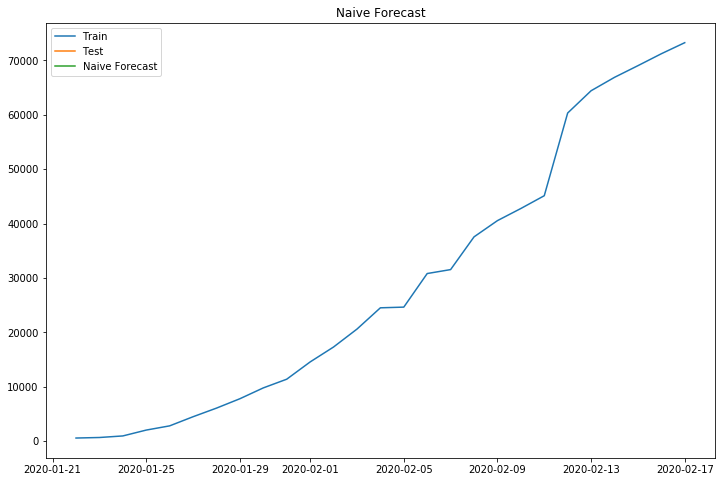

In [152]:
dd= np.asarray(train.Confirmed)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Confirmed'], label='Train')
plt.plot(test.index,test['Confirmed'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

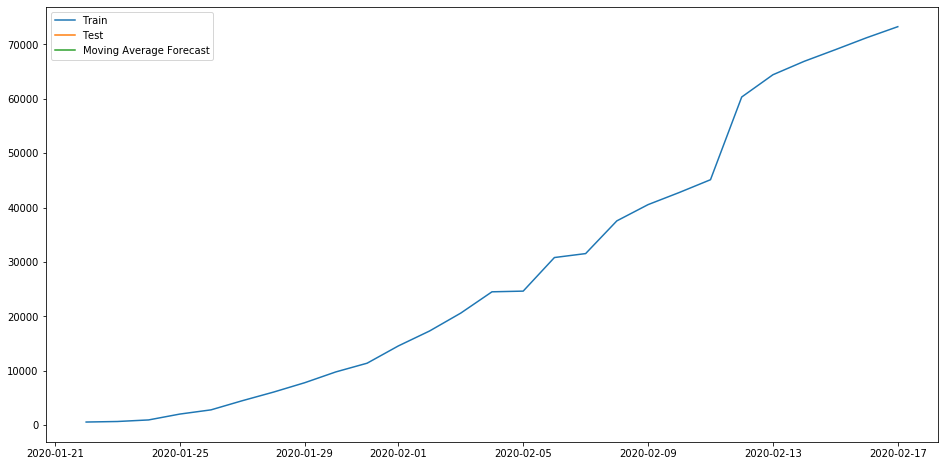

In [147]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Confirmed'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Confirmed'], label='Train')
plt.plot(test['Confirmed'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

### Holt’s Linear Trend method maps the trend accurately without any assumptions.

In [148]:
!pip install statsmodels

In [149]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

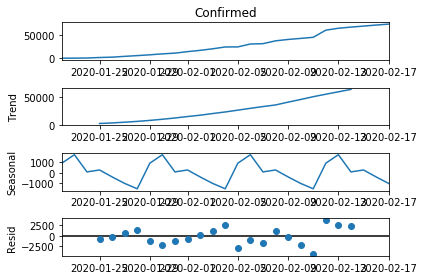

In [150]:
sm.tsa.seasonal_decompose(train.Confirmed).plot()
result = sm.tsa.stattools.adfuller(train.Confirmed)
# plt.figure(figsize=(15,10))
plt.show()

## The idea was to predict cases reported vs time but I think I made some mistake while feeding the data to the above statistical models and therefore it is not giving me proper test results. But was still able to get insights into trends! 